In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from feature_engine.encoding import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import time

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [2]:
def plot1(c,y_test,y_pred,ylabel):
    fig = plt.figure(figsize=(25,6))
    plt.subplot(1, 3, 1)
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-",label="y_test")     
    plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-",label="y_pred")
    plt.title('Actual vs Predicted',fontsize=20)
    plt.legend(loc="best")             
    plt.xlabel('Index of data points', fontsize=18)                               
    plt.ylabel(ylabel, fontsize=16) 
    
    plt.subplot(1, 3, 2)
    plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
    plt.title('Error variation',fontsize=20)            
    plt.xlabel('Index of data points', fontsize=18)                     
    plt.ylabel('ytest - ypred', fontsize=16)  
    
    plt.subplot(1, 3, 3)
    sns.kdeplot((y_test-y_pred),color='r')
    plt.title('Error distribution',fontsize=20)              
    plt.xlabel('y_test - y_pred', fontsize=18)                 
    plt.ylabel('Index of data points', fontsize=16)
    plt.show()
    
def plot2(y_test,y_pred):
    fig = plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test,y=y_pred,color='b')
    plt.title('y_test vs y_pred',fontsize=20) 
    plt.xlabel('y_test', fontsize=18)                          
    plt.ylabel('y_pred', fontsize=16)  
    
    plt.subplot(1, 2, 2)
    sns.regplot(x=y_test,y=y_pred,scatter=False,color='k')
    sns.regplot(x=y_test,y=y_test,scatter=False,color='g')
    plt.legend(labels=['model prediction','Actual line'])
    plt.title('Actual vs model prediction',fontsize=20)           
    plt.show()
    
def regression_plots(y_test,y_pred,ylabel,length):
    print('\n\n')
    y_test = y_test.values.ravel()
    y_pred = y_pred.ravel()
    c = [i for i in range(length)]
    plot1(c,y_test,y_pred,ylabel)
    print('\n')
    plot2(y_test,y_pred)
    print('\n')

In [3]:
df=pd.read_csv(r"car_data2.csv") 
df.tail(5)

name      year  selling_price  km_driven    fuel seller_type  \
6708   Maruti  0.269231         260000      50000  Petrol  Individual   
6709  Hyundai  0.230769         475000      80000  Diesel  Individual   
6710  Hyundai  0.269231         320000     110000  Petrol  Individual   
6711  Hyundai  0.500000         135000     119000  Diesel  Individual   
6712   Maruti  0.423077         382000     120000  Diesel  Individual   

      transmission                 owner  mileage  engine  max_power  seats  \
6708             0          Second Owner    18.90     998      67.10      5   
6709             0          Second Owner    22.54    1396      88.73      5   
6710             0           First Owner    18.50    1197      82.85      5   
6711             0  Fourth & Above Owner    16.80    1493     110.00      5   
6712             0           First Owner    19.30    1248      73.90      5   

      torque_NM  torque_rpm  
6708       90.0      3500.0  
6709      219.7      1500.0  
6710      113.7      4000.0  
6711       24.0         1.0  
6712      190.0      2000.0

In [4]:
df.shape

(6713, 14)

In [5]:
X=df.iloc[:,df.columns!='selling_price']
y=df.iloc[:,df.columns=='selling_price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

X_train.shape,X_test.shape

((5034, 13), (1679, 13))

In [6]:
scaler=StandardScaler()
encoder = OneHotEncoder(drop_last=True)

cat_columns=['name','fuel','seller_type','owner']
num_columns=['km_driven','mileage','engine','max_power','seats','torque_NM','torque_rpm']
other_col=['transmission','year']

preprocessor = ColumnTransformer(
    transformers=[
        ('other','passthrough',other_col),
        ('num', scaler, num_columns),
        ('cat', encoder, cat_columns)])


X_train= preprocessor.fit_transform(X_train)
X_test= preprocessor.transform(X_test)

preprocessor

ColumnTransformer(transformers=[('other', 'passthrough',
                                 ['transmission', 'year']),
                                ('num', StandardScaler(),
                                 ['km_driven', 'mileage', 'engine', 'max_power',
                                  'seats', 'torque_NM', 'torque_rpm']),
                                ('cat', OneHotEncoder(drop_last=True),
                                 ['name', 'fuel', 'seller_type', 'owner'])])

In [7]:
X_train.shape,X_test.shape

((5034, 47), (1679, 47))

<h3>Using onehot encoding

Results for Ridge Regressor:-

Training time(sec) =  0.056998252868652344
Prediction time(sec) =  0.0


Training r2_score = 0.76023667495564
Testing r2_score = 0.6971223165845204

Training mean_square_error = 60266239478.47544
Testing mean_square_error = 91461436294.49536

Training mean_absolute_error = 133480.11869249382
Testing mean_absolute_error = 132864.79209141212





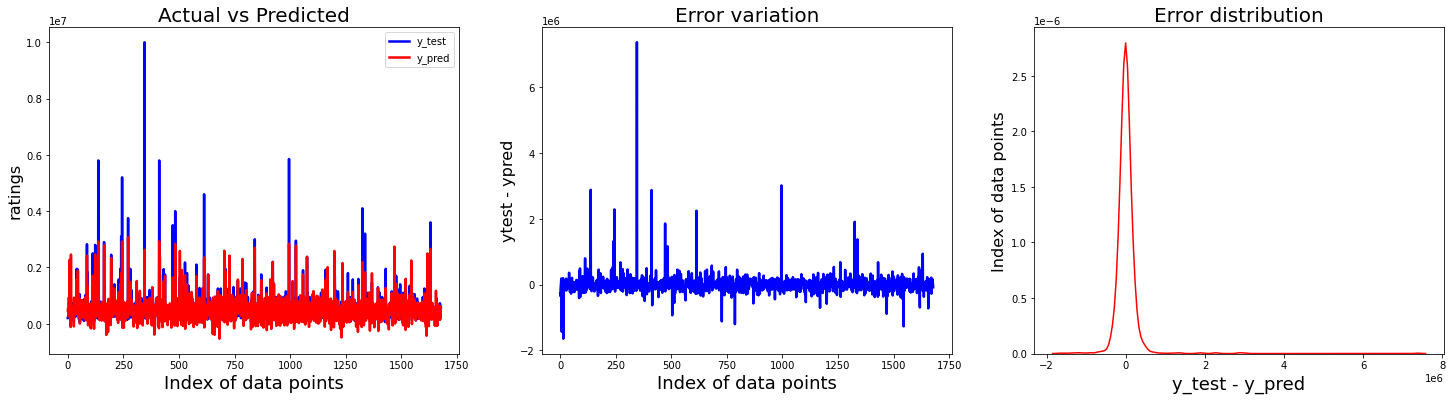

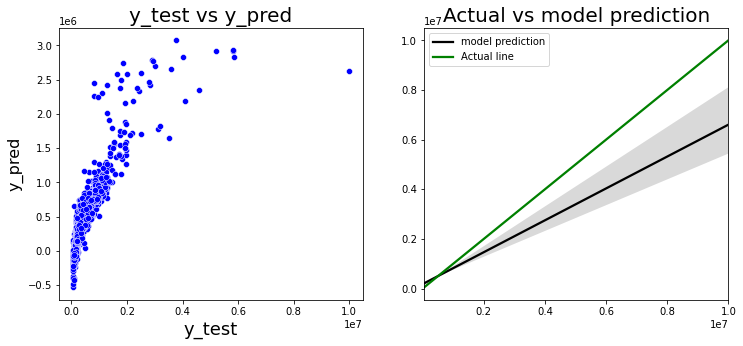

In [8]:
ridge = Ridge(alpha=1.0)

print('Results for Ridge Regressor:-\n')
start_time = time.time()
ridge.fit(X_train,y_train)
ridge_time = (time.time() - start_time)
print('Training time(sec) = ',ridge_time)

y_pred1 = ridge.predict(X_train)

start_time = time.time()
y_pred = ridge.predict(X_test)
ridge_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',ridge_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Ridge = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,ridge_time,ridge_time2]

Results for Lasso Regressor:-

Training time(sec) =  0.3290252685546875
Prediction time(sec) =  0.0


Training r2_score = 0.7704743855652655
Testing r2_score = 0.6880126310793552

Training mean_square_error = 57692917144.057236
Testing mean_square_error = 94212332006.24915

Training mean_absolute_error = 131455.6074327838
Testing mean_absolute_error = 132700.80974484907





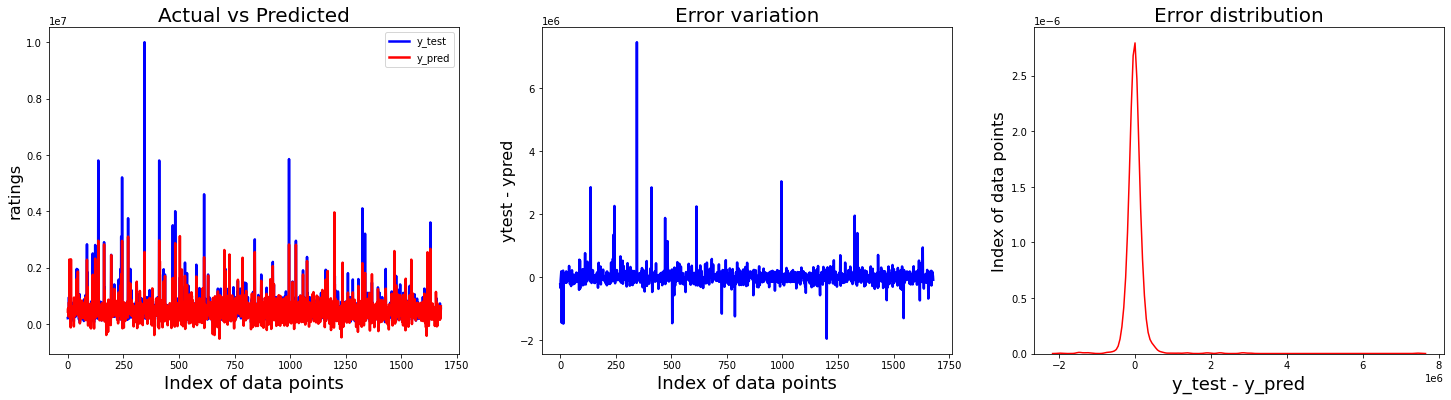

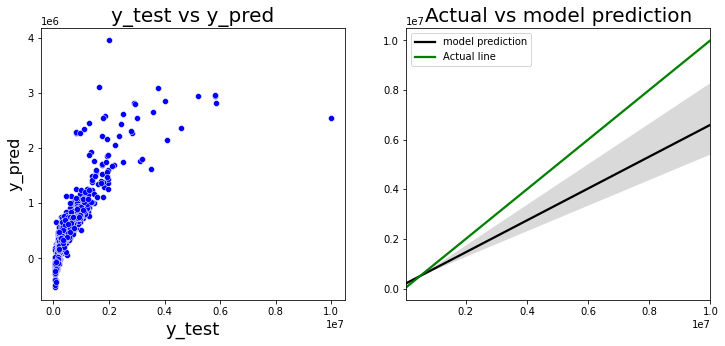

In [9]:
lasso = Lasso(alpha=1.0)

print('Results for Lasso Regressor:-\n')
start_time = time.time()
lasso.fit(X_train,y_train)
lasso_time = (time.time() - start_time)
print('Training time(sec) = ',lasso_time)

y_pred1 = lasso.predict(X_train)

start_time = time.time()
y_pred = lasso.predict(X_test)
lasso_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lasso_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Lasso = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,lasso_time,lasso_time2]

Results for knn Regressor:-

Training time(sec) =  0.003002643585205078
Prediction time(sec) =  0.25900697708129883


Training r2_score = 0.8502573244826848
Testing r2_score = 0.8029158374115396

Training mean_square_error = 37638900533.28421
Testing mean_square_error = 59514456060.175934

Training mean_absolute_error = 90484.97401668652
Testing mean_absolute_error = 110218.68147706968





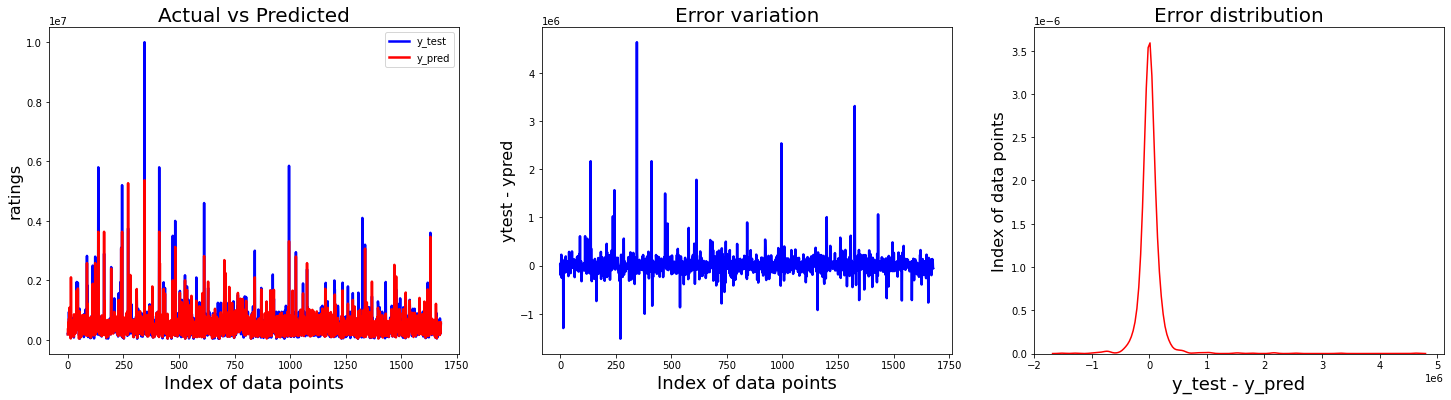

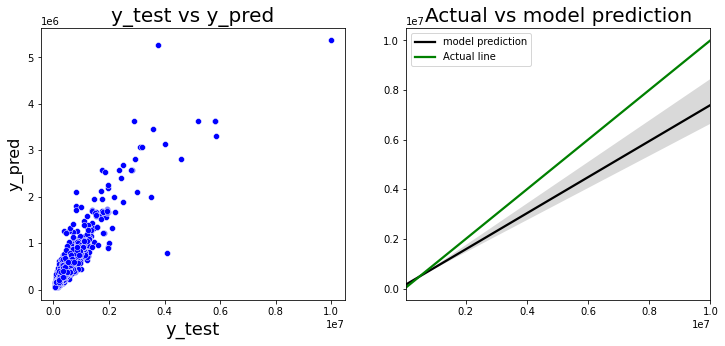

In [10]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

print('Results for knn Regressor:-\n')
start_time = time.time()
knn.fit(X_train,y_train)
knn_time = (time.time() - start_time)
print('Training time(sec) = ',knn_time)

y_pred1 = knn.predict(X_train)

start_time = time.time()
y_pred = knn.predict(X_test)
knn_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',knn_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

KNN = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,knn_time,knn_time2]

Results for Support vector Regressor:-

Training time(sec) =  0.004992961883544922
Prediction time(sec) =  0.0


Training r2_score = 0.8502573244826848
Testing r2_score = -0.8747876273588238

Training mean_square_error = 37638900533.28421
Testing mean_square_error = 566138670937.2316

Training mean_absolute_error = 90484.97401668652
Testing mean_absolute_error = 513843.7784791948





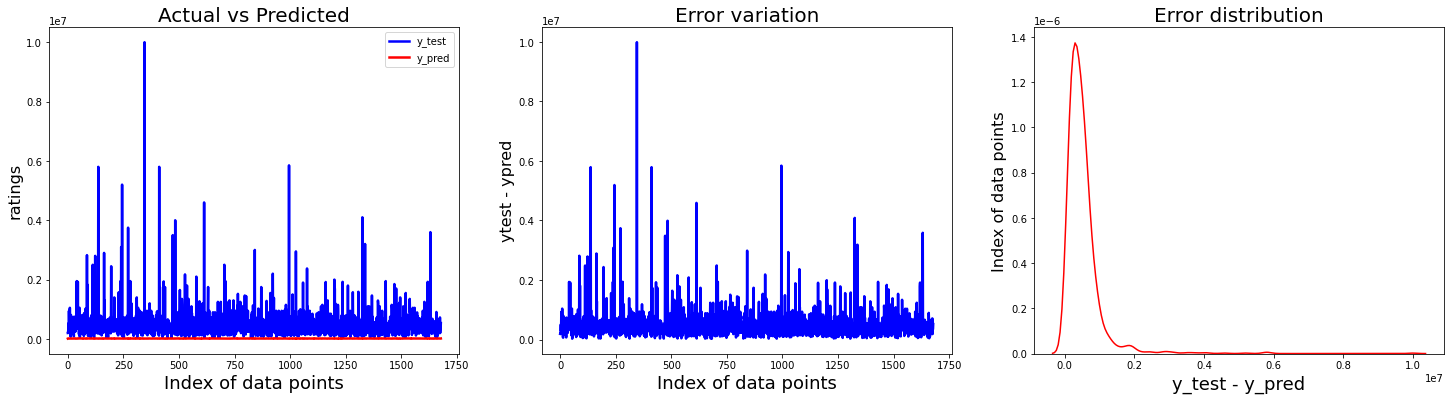

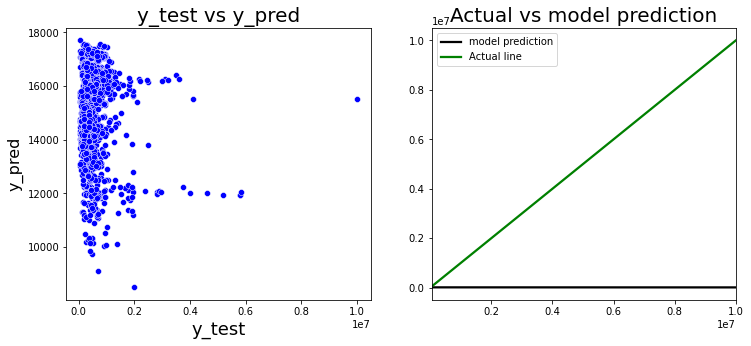

In [11]:
svr = LinearSVR()

print('Results for Support vector Regressor:-\n')
start_time = time.time()
svr.fit(X_train,y_train)
svr_time = (time.time() - start_time)
print('Training time(sec) = ',svr_time)

y_pred1 = knn.predict(X_train)

start_time = time.time()
y_pred = svr.predict(X_test)
svr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svr_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

SVR = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,svr_time,svr_time2]

Results for DecisionTree Regressor:-

Training time(sec) =  0.04898786544799805
Prediction time(sec) =  0.0010001659393310547


Training r2_score = 0.9991492524779543
Testing r2_score = 0.8373792141992847

Training mean_square_error = 213841520.1317375
Testing mean_square_error = 49107383789.2169

Training mean_absolute_error = 3407.1660045027143
Testing mean_absolute_error = 98997.33105022831





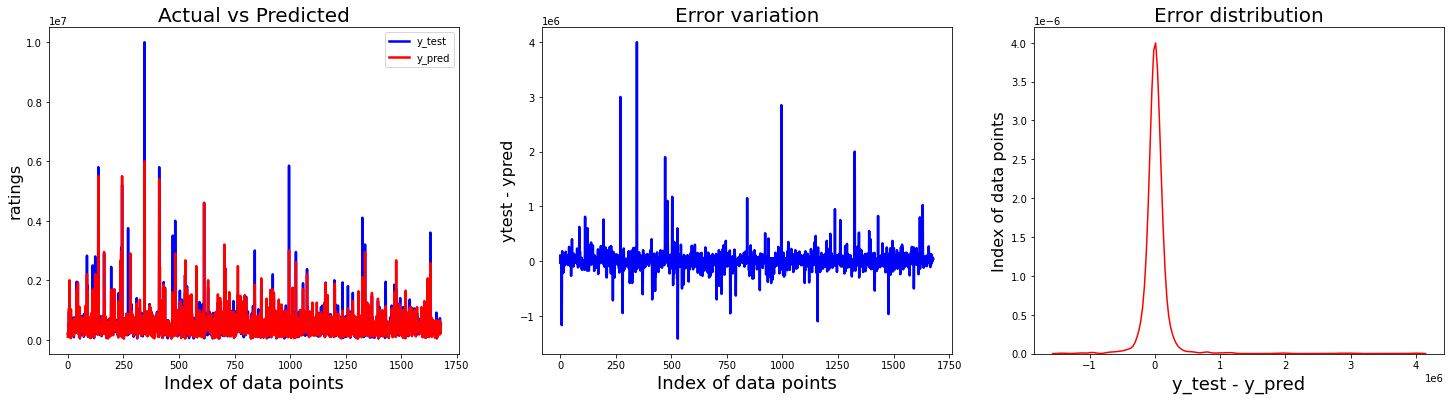

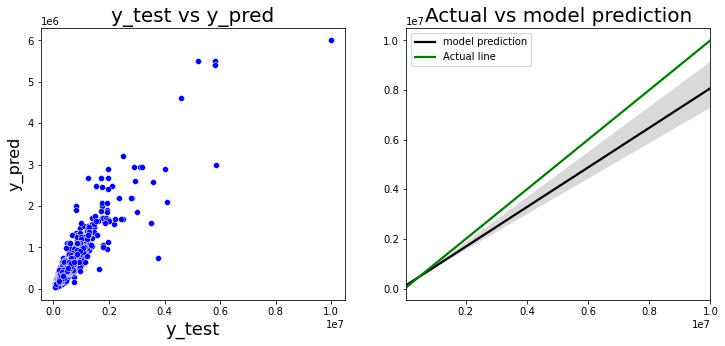

In [12]:
dt = DecisionTreeRegressor(max_depth=None)

print('Results for DecisionTree Regressor:-\n')
start_time = time.time()
dt.fit(X_train,y_train)
dt_time = (time.time() - start_time)
print('Training time(sec) = ',dt_time)

y_pred1 = dt.predict(X_train)

start_time = time.time()
y_pred = dt.predict(X_test)
dt_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dt_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

DT = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,dt_time,dt_time2]

Results for RandomForest Regressor:-

Training time(sec) =  0.7543282508850098
Prediction time(sec) =  0.10808491706848145


Training r2_score = 0.9877606339618699
Testing r2_score = 0.8686261083325783

Training mean_square_error = 3076452850.25221
Testing mean_square_error = 39671608313.96443

Training mean_absolute_error = 29904.57678980322
Testing mean_absolute_error = 80065.94027624196





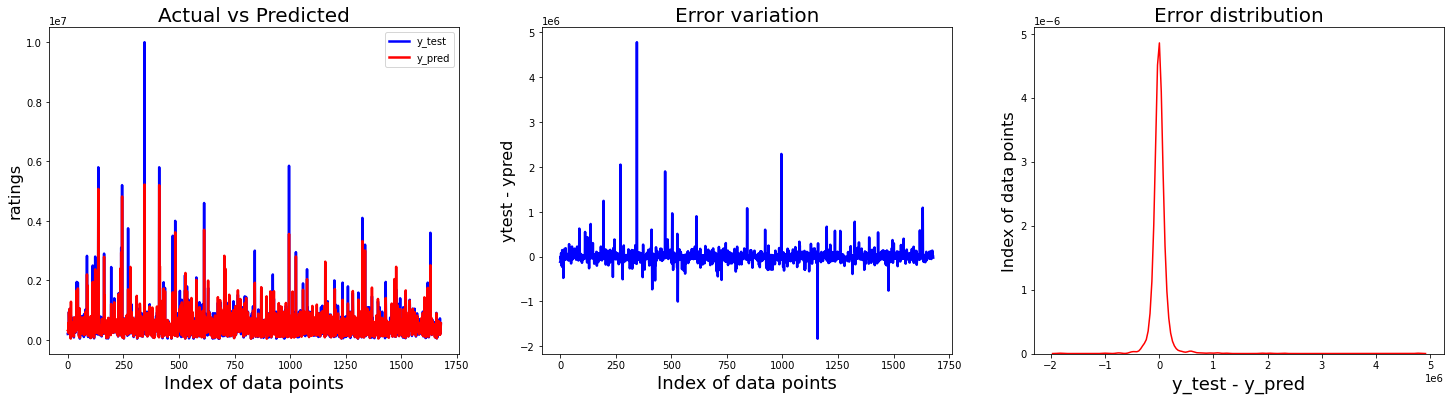

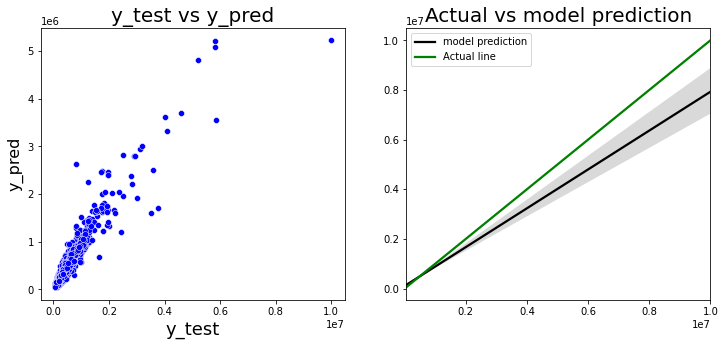

In [13]:
rf = RandomForestRegressor(n_jobs=-1)

print('Results for RandomForest Regressor:-\n')
start_time = time.time()
rf.fit(X_train,y_train)
rf_time = (time.time() - start_time)
print('Training time(sec) = ',rf_time)

y_pred1 = rf.predict(X_train)

start_time = time.time()
y_pred = rf.predict(X_test)
rf_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',rf_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

RF = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,rf_time,rf_time2]

Results for ExtraTrees Regressor:-

Training time(sec) =  0.7136812210083008
Prediction time(sec) =  0.11070775985717773


Training r2_score = 0.9991478426283035
Testing r2_score = 0.882849173391993

Training mean_square_error = 214195896.00082773
Testing mean_square_error = 35376600691.82927

Training mean_absolute_error = 3446.210501920275
Testing mean_absolute_error = 79274.24778439547





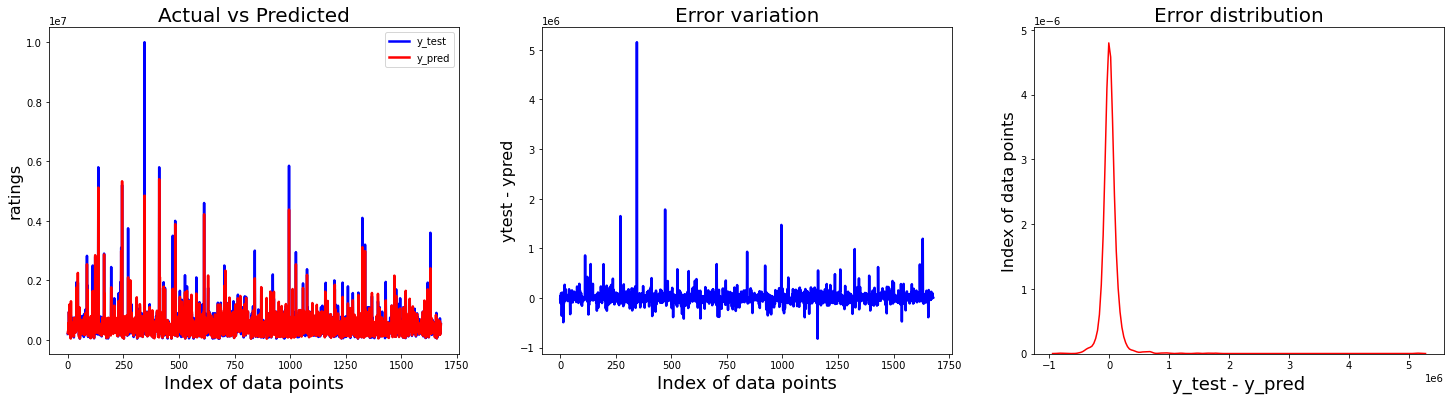

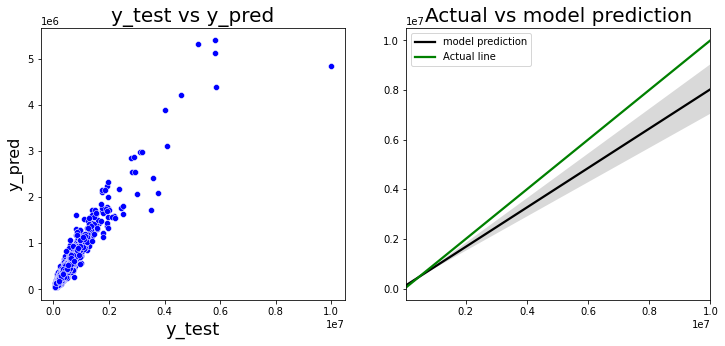

In [14]:
etree = ExtraTreesRegressor(n_jobs=-1)

print('Results for ExtraTrees Regressor:-\n')
start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Extra_tree = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,etree_time,etree_time2]

In [15]:
s1=[Ridge,Lasso,KNN,SVR,DT,RF,Extra_tree]
s2=['Ridge','Lasso','Knn','Linear_svr','Decision_tree','Random_forest','Extra_tree']
col=['r2_score(train)','r2_score(test)','MSE(train)','MSE(test)','MAE(train)','MAE(train)','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

In [16]:
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'model'})

In [17]:
result

model  r2_score(train)  r2_score(test)    MSE(train)     MSE(test)  \
0          Ridge         0.760237        0.697122  6.026624e+10  9.146144e+10   
1          Lasso         0.770474        0.688013  5.769292e+10  9.421233e+10   
2            Knn         0.850257        0.802916  3.763890e+10  5.951446e+10   
3     Linear_svr         0.850257       -0.874788  3.763890e+10  5.661387e+11   
4  Decision_tree         0.999149        0.837379  2.138415e+08  4.910738e+10   
5  Random_forest         0.987761        0.868626  3.076453e+09  3.967161e+10   
6     Extra_tree         0.999148        0.882849  2.141959e+08  3.537660e+10   

      MAE(train)     MAE(train)  Training time  Prediction time  
0  133480.118692  132864.792091       0.056998         0.000000  
1  131455.607433  132700.809745       0.329025         0.000000  
2   90484.974017  110218.681477       0.003003         0.259007  
3   90484.974017  513843.778479       0.004993         0.000000  
4    3407.166005   98997.331050       0.048988         0.001000  
5   29904.576790   80065.940276       0.754328         0.108085  
6    3446.210502   79274.247784       0.713681         0.110708

<h3>Using label encoding

In [18]:
X=df.iloc[:,df.columns!='selling_price']
y=df.iloc[:,df.columns=='selling_price']

cat_columns=['name','fuel','seller_type','owner']

encoder = OrdinalEncoder()

X[cat_columns]= encoder.fit_transform(X[cat_columns])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

X_train.shape,X_test.shape

((5034, 13), (1679, 13))

In [19]:
scaler = StandardScaler()

num_columns=['km_driven','mileage','engine','max_power','torque_NM','torque_rpm']

X_train[num_columns]= scaler.fit_transform(X_train[num_columns])
X_test[num_columns]= scaler.transform(X_test[num_columns])

In [20]:
X_train.shape,X_test.shape

((5034, 13), (1679, 13))

Results for Ridge Regressor:-

Training time(sec) =  0.010983467102050781
Prediction time(sec) =  0.003000974655151367


Training r2_score = 0.6358997025192257
Testing r2_score = 0.6235473362467494

Training mean_square_error = 91519233469.50871
Testing mean_square_error = 113679228312.53836

Training mean_absolute_error = 166816.46045030645
Testing mean_absolute_error = 169471.98764187438





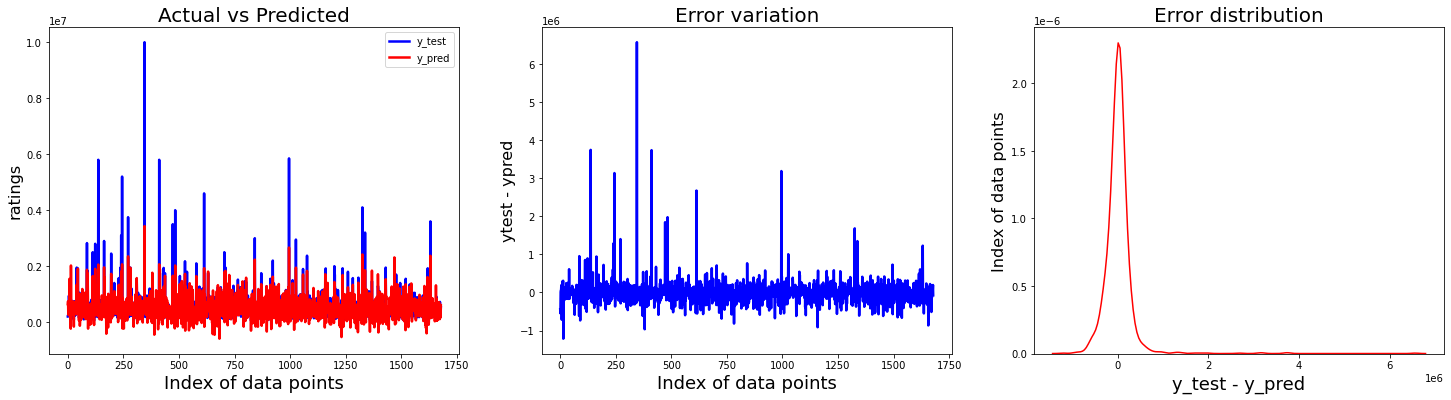

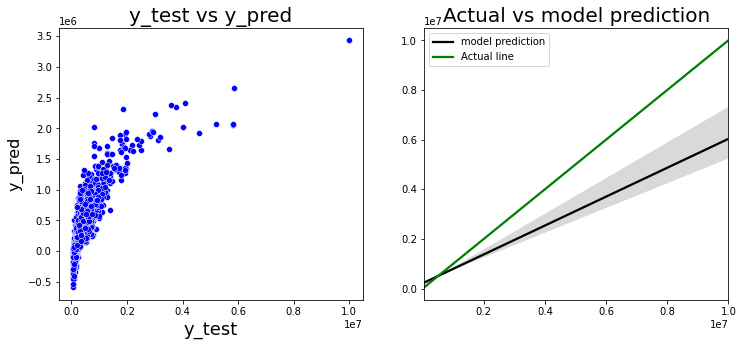

In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

print('Results for Ridge Regressor:-\n')
start_time = time.time()
ridge.fit(X_train,y_train)
ridge_time = (time.time() - start_time)
print('Training time(sec) = ',ridge_time)

y_pred1 = ridge.predict(X_train)

start_time = time.time()
y_pred = ridge.predict(X_test)
ridge_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',ridge_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Ridge = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,ridge_time,ridge_time2]

Results for Lasso Regressor:-

Training time(sec) =  0.01399993896484375
Prediction time(sec) =  0.0029990673065185547


Training r2_score = 0.6359117363175155
Testing r2_score = 0.623258189872602

Training mean_square_error = 91516208687.59329
Testing mean_square_error = 113766543239.08115

Training mean_absolute_error = 166942.42535887263
Testing mean_absolute_error = 169540.75534820344





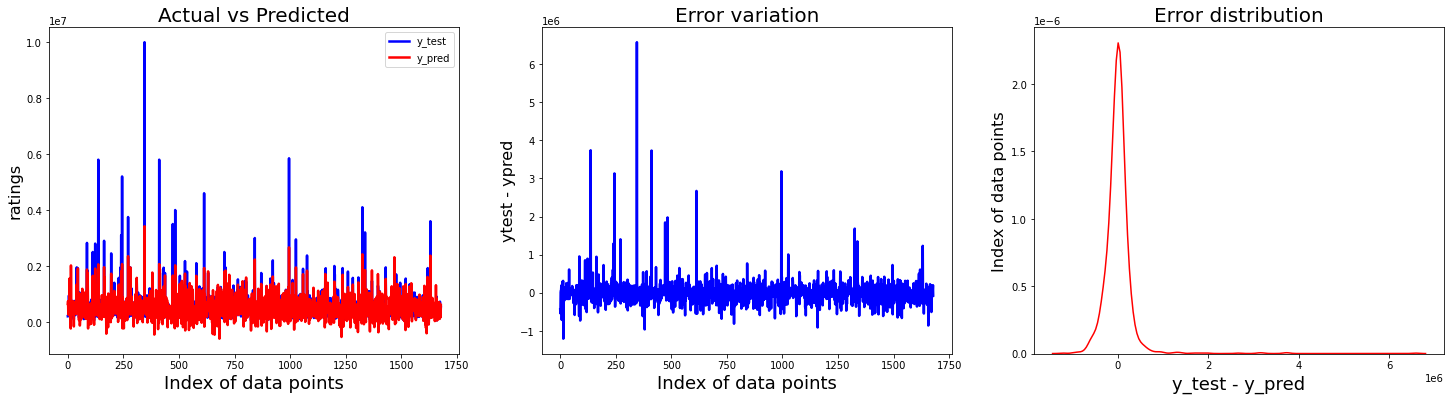

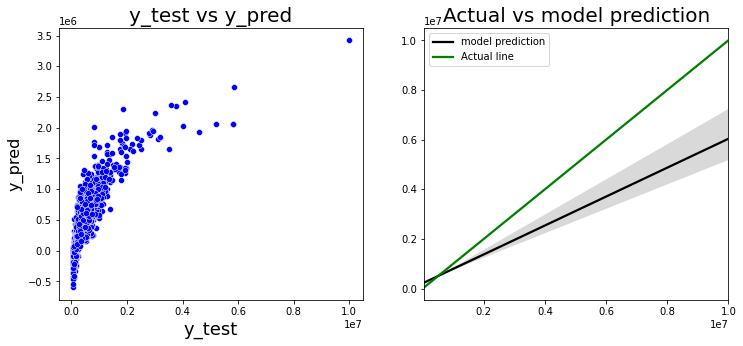

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

print('Results for Lasso Regressor:-\n')
start_time = time.time()
lasso.fit(X_train,y_train)
lasso_time = (time.time() - start_time)
print('Training time(sec) = ',lasso_time)

y_pred1 = lasso.predict(X_train)

start_time = time.time()
y_pred = lasso.predict(X_test)
lasso_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lasso_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Lasso = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,lasso_time,lasso_time2]

Results for knn Regressor:-

Training time(sec) =  0.028006553649902344
Prediction time(sec) =  0.04300379753112793


Training r2_score = 0.8459090771206679
Testing r2_score = 0.6689969000573341

Training mean_square_error = 38731863841.08983
Testing mean_square_error = 99954604107.15546

Training mean_absolute_error = 92265.90413190305
Testing mean_absolute_error = 117061.15175699822





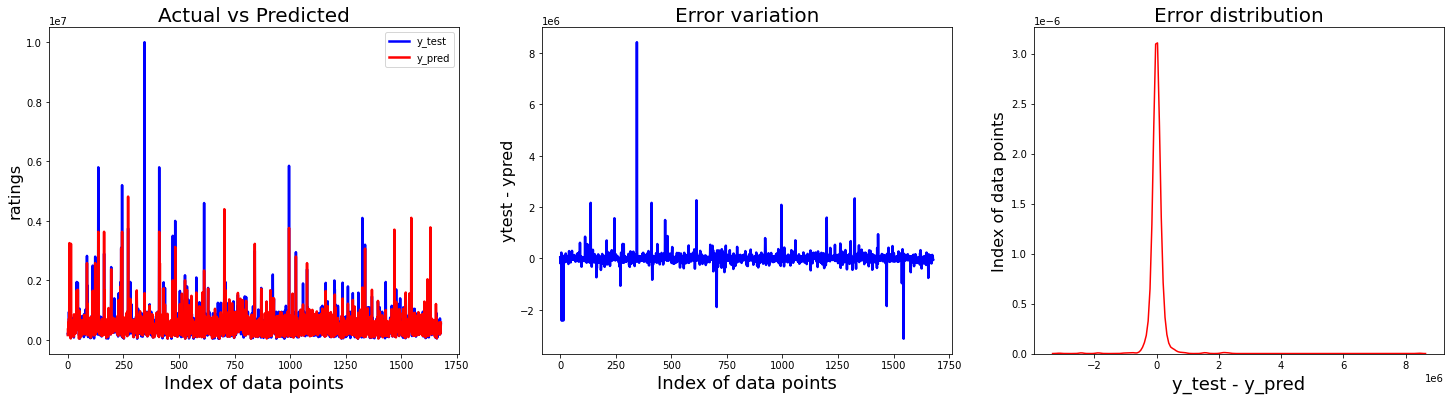

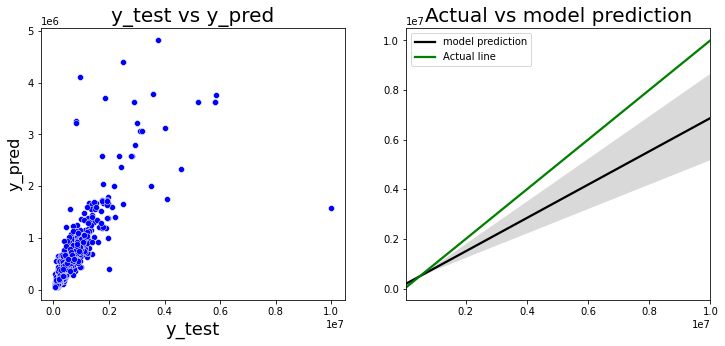

In [23]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

print('Results for knn Regressor:-\n')
start_time = time.time()
knn.fit(X_train,y_train)
knn_time = (time.time() - start_time)
print('Training time(sec) = ',knn_time)

y_pred1 = knn.predict(X_train)

start_time = time.time()
y_pred = knn.predict(X_test)
knn_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',knn_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

KNN = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,knn_time,knn_time2]

Results for Support vector Regressor:-

Training time(sec) =  0.007004499435424805
Prediction time(sec) =  0.002000093460083008


Training r2_score = 0.8459090771206679
Testing r2_score = -0.17629943279669913

Training mean_square_error = 38731863841.08983
Testing mean_square_error = 355212818662.5182

Training mean_absolute_error = 92265.90413190305
Testing mean_absolute_error = 305888.2894030442





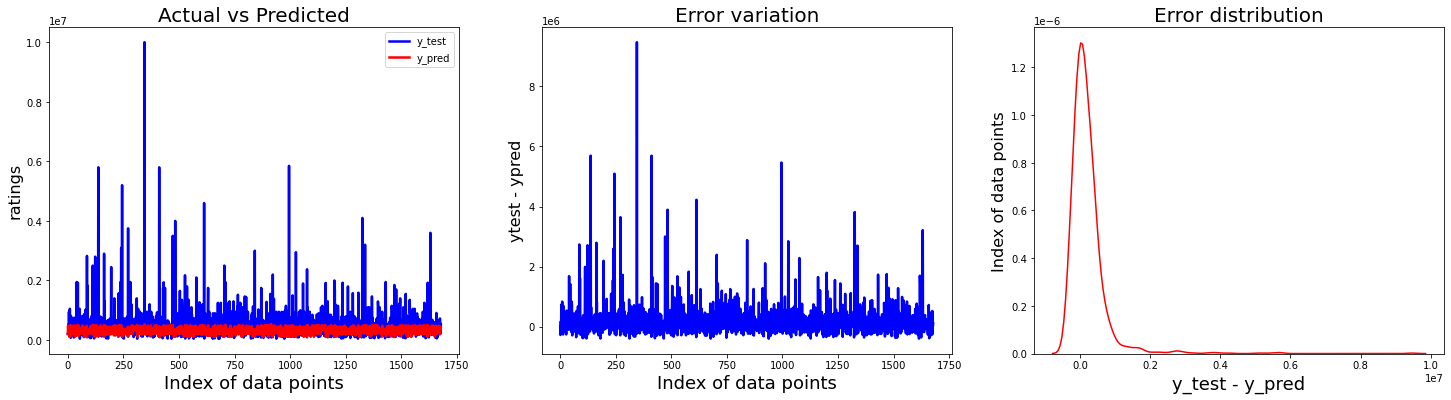

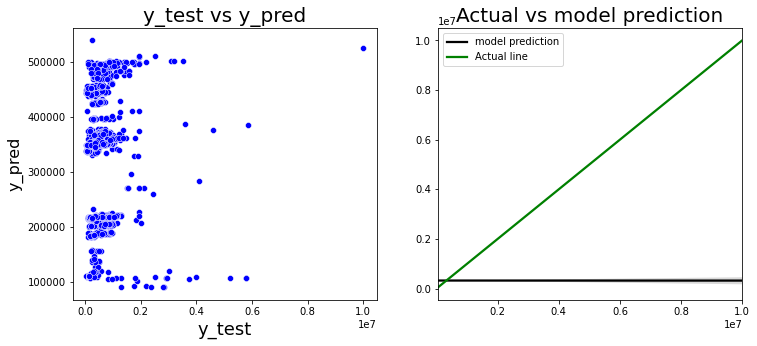

In [24]:
svr = LinearSVR()

print('Results for Support vector Regressor:-\n')
start_time = time.time()
svr.fit(X_train,y_train)
svr_time = (time.time() - start_time)
print('Training time(sec) = ',svr_time)

y_pred1 = knn.predict(X_train)

start_time = time.time()
y_pred = svr.predict(X_test)
svr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svr_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

SVR = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,svr_time,svr_time2]

Results for DecisionTree Regressor:-

Training time(sec) =  0.0350186824798584
Prediction time(sec) =  0.003997325897216797


Training r2_score = 0.9991492524779543
Testing r2_score = 0.8047363405990351

Training mean_square_error = 213841520.1317375
Testing mean_square_error = 58964709923.618774

Training mean_absolute_error = 3407.1660045027143
Testing mean_absolute_error = 104937.31655747468





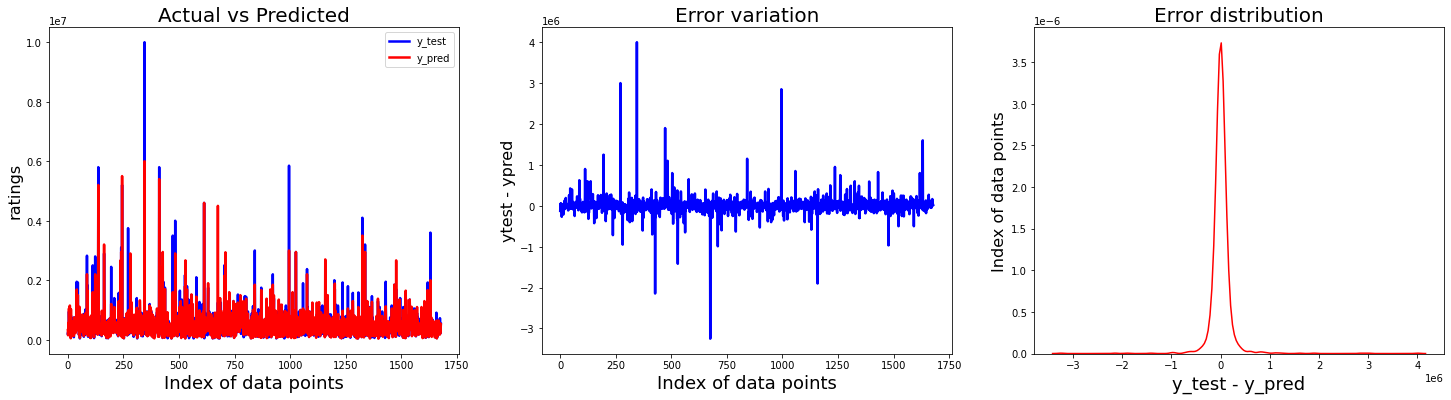

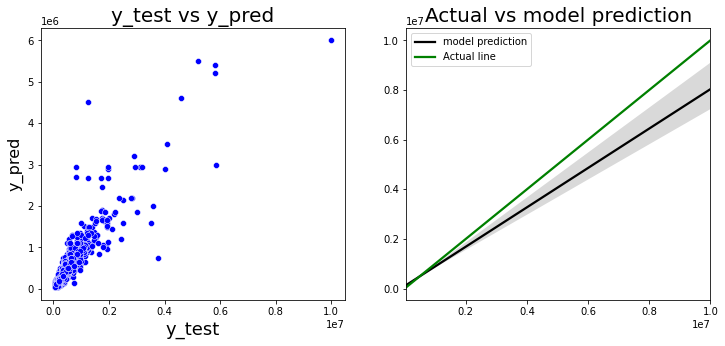

In [25]:
dt = DecisionTreeRegressor(max_depth=None)

print('Results for DecisionTree Regressor:-\n')
start_time = time.time()
dt.fit(X_train,y_train)
dt_time = (time.time() - start_time)
print('Training time(sec) = ',dt_time)

y_pred1 = dt.predict(X_train)

start_time = time.time()
y_pred = dt.predict(X_test)
dt_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dt_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

DT = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,dt_time,dt_time2]

Results for RandomForest Regressor:-

Training time(sec) =  0.5069034099578857
Prediction time(sec) =  0.1277024745941162


Training r2_score = 0.9881524174422736
Testing r2_score = 0.8671857586364156

Training mean_square_error = 2977975249.2706966
Testing mean_square_error = 40106557665.437996

Training mean_absolute_error = 29837.788791476545
Testing mean_absolute_error = 81464.67182090839





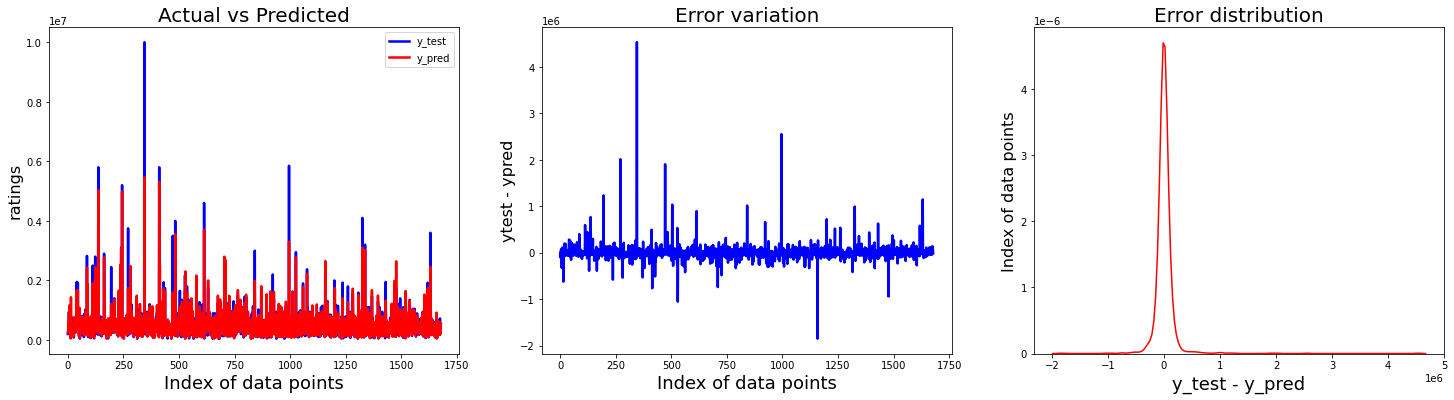

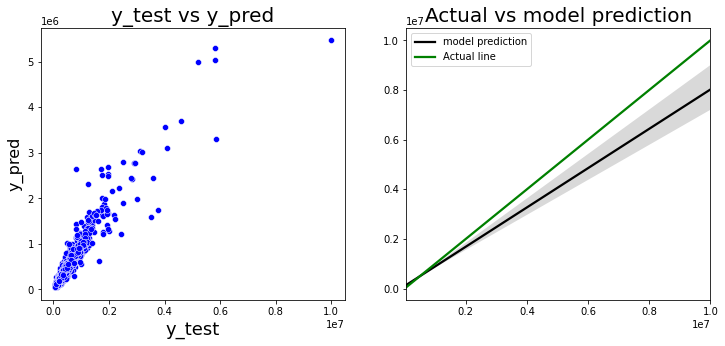

In [26]:
rf = RandomForestRegressor(n_jobs=-1)

print('Results for RandomForest Regressor:-\n')
start_time = time.time()
rf.fit(X_train,y_train)
rf_time = (time.time() - start_time)
print('Training time(sec) = ',rf_time)

y_pred1 = rf.predict(X_train)

start_time = time.time()
y_pred = rf.predict(X_test)
rf_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',rf_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

RF = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,rf_time,rf_time2]

Results for ExtraTrees Regressor:-

Training time(sec) =  0.40648531913757324
Prediction time(sec) =  0.11854863166809082


Training r2_score = 0.9991477791388815
Testing r2_score = 0.8846879441108302

Training mean_square_error = 214211854.52453318
Testing mean_square_error = 34821338220.64085

Training mean_absolute_error = 3442.1216395179445
Testing mean_absolute_error = 79343.37311097876





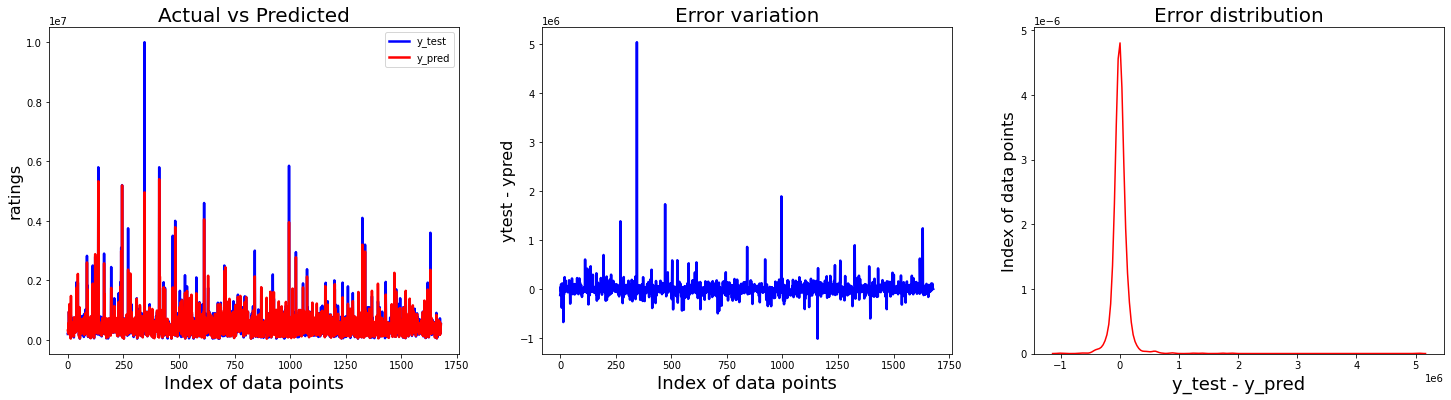

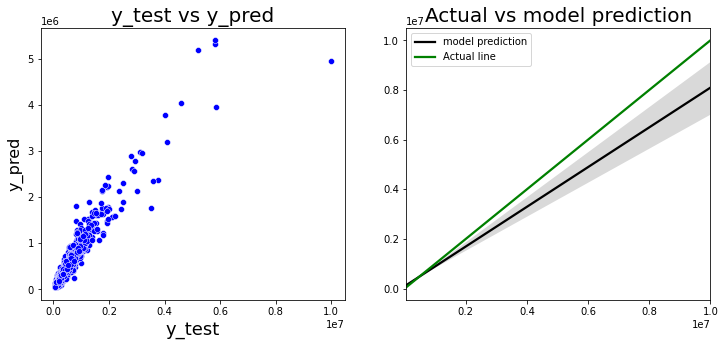

In [27]:
etree = ExtraTreesRegressor(n_jobs=-1)

print('Results for ExtraTrees Regressor:-\n')
start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Extra_tree = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,etree_time,etree_time2]

In [28]:
s1=[Ridge,Lasso,KNN,SVR,DT,RF,Extra_tree]
s2=['Ridge','Lasso','Knn','Linear_svr','Decision_tree','Random_forest','Extra_tree']
col=['r2_score(train)','r2_score(test)','MSE(train)','MSE(test)','MAE(train)','MAE(train)','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]

In [29]:
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'model'})

In [30]:
#with label encoding
result2

model  r2_score(train)  r2_score(test)    MSE(train)     MSE(test)  \
0          Ridge         0.635900        0.623547  9.151923e+10  1.136792e+11   
1          Lasso         0.635912        0.623258  9.151621e+10  1.137665e+11   
2            Knn         0.845909        0.668997  3.873186e+10  9.995460e+10   
3     Linear_svr         0.845909       -0.176299  3.873186e+10  3.552128e+11   
4  Decision_tree         0.999149        0.804736  2.138415e+08  5.896471e+10   
5  Random_forest         0.988152        0.867186  2.977975e+09  4.010656e+10   
6     Extra_tree         0.999148        0.884688  2.142119e+08  3.482134e+10   

      MAE(train)     MAE(train)  Training time  Prediction time  
0  166816.460450  169471.987642       0.010983         0.003001  
1  166942.425359  169540.755348       0.014000         0.002999  
2   92265.904132  117061.151757       0.028007         0.043004  
3   92265.904132  305888.289403       0.007004         0.002000  
4    3407.166005  104937.316557       0.035019         0.003997  
5   29837.788791   81464.671821       0.506903         0.127702  
6    3442.121640   79343.373111       0.406485         0.118549

In [31]:
#With onehot encoding
result

model  r2_score(train)  r2_score(test)    MSE(train)     MSE(test)  \
0          Ridge         0.760237        0.697122  6.026624e+10  9.146144e+10   
1          Lasso         0.770474        0.688013  5.769292e+10  9.421233e+10   
2            Knn         0.850257        0.802916  3.763890e+10  5.951446e+10   
3     Linear_svr         0.850257       -0.874788  3.763890e+10  5.661387e+11   
4  Decision_tree         0.999149        0.837379  2.138415e+08  4.910738e+10   
5  Random_forest         0.987761        0.868626  3.076453e+09  3.967161e+10   
6     Extra_tree         0.999148        0.882849  2.141959e+08  3.537660e+10   

      MAE(train)     MAE(train)  Training time  Prediction time  
0  133480.118692  132864.792091       0.056998         0.000000  
1  131455.607433  132700.809745       0.329025         0.000000  
2   90484.974017  110218.681477       0.003003         0.259007  
3   90484.974017  513843.778479       0.004993         0.000000  
4    3407.166005   98997.331050       0.048988         0.001000  
5   29904.576790   80065.940276       0.754328         0.108085  
6    3446.210502   79274.247784       0.713681         0.110708

<p3>From above we can see that that tree based models works well with label encoding while models like ridge,lasso and knn requires data between 0 and 1 i.e. they works better on scaled data</p3>

<p3>One possible solution is that we can first do label encoding and then convert them to binary for models like knn,ridge and lasso</p3>

<h5>Also we can see that training and testing time reduces for labl encoding since dimensionality is reduced  

In [32]:
class Binary_encoder:
    def __init__(self,columns = []):
        self.col = columns
        
    def fit_transform(self,data):
        if not self.col:
            print ('Column names not provided')
            return data
        else:
            col_list = self.col
            X = data.copy()
            
        for k in range(len(col_list)):
            X[col_list[k]] = X[col_list[k]].astype('int32')
            l = []
            name_list = X[col_list[k]].values.tolist() 
            
            for i in range(len(name_list)):
                p=list(bin(name_list[i]).replace("0b", ""))
                l.append(p)
            
            max_len = 0
            for i in range(len(l)):
                if len(l[i]) > max_len:
                    max_len = len(l[i])
                    
            for i in range(len(l)):
                if len(l[i]) < max_len:
                    while(len(l[i]) < max_len):
                        l[i].insert(0,'0')
                        
            for i in range(len(l)):
                for j in range(len(l[i])):
                    l[i][j] = int(l[i][j])
                    
            column = []
            for i in range(max_len):
                column.append(str(col_list[k])+'_'+str(i)+'_bit')
            
            data = pd.DataFrame(l, columns = column) 
            X.drop(columns=[col_list[k]],inplace = True)
            X = pd.concat([X, data], axis=1)
            print('Done for column = {}'.format(col_list[k]))
            
        return X

In [33]:
X=df.iloc[:,df.columns!='selling_price']
y=df.iloc[:,df.columns=='selling_price']

cat_columns=['name','fuel','seller_type','owner']

encoder = OrdinalEncoder()

X[cat_columns]= encoder.fit_transform(X[cat_columns])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

X_train.shape,X_test.shape

((5034, 13), (1679, 13))

In [34]:
X.head()

name      year  km_driven  fuel  seller_type  transmission  owner  mileage  \
0  20.0  0.230769     145500   1.0          1.0             0    0.0    23.40   
1  26.0  0.230769     120000   1.0          1.0             0    2.0    21.14   
2  10.0  0.538462     140000   3.0          1.0             0    4.0    17.70   
3  11.0  0.384615     127000   1.0          1.0             0    0.0    23.00   
4  20.0  0.500000     120000   3.0          1.0             0    0.0    16.10   

   engine  max_power  seats  torque_NM  torque_rpm  
0    1248      74.00      5      190.0      2000.0  
1    1498     103.52      5      250.0      1500.0  
2    1497      78.00      5       12.7         2.0  
3    1396      90.00      5       22.4      1750.0  
4    1298      88.20      5       11.5         4.0

In [35]:
col = ['name','fuel','seller_type','owner','seats']

binary_encoder = Binary_encoder(col)

In [36]:
X  =  binary_encoder.fit_transform(X)

Done for column = name
Done for column = fuel
Done for column = seller_type
Done for column = owner
Done for column = seats


In [37]:
print(X.shape)

(6713, 24)


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

X_train.shape,X_test.shape

((5034, 24), (1679, 24))

In [39]:
scaler = StandardScaler()

num_columns=['km_driven','mileage','engine','max_power','torque_NM','torque_rpm']

X_train[num_columns]= scaler.fit_transform(X_train[num_columns])
X_test[num_columns]= scaler.transform(X_test[num_columns])

In [40]:
X_train.shape,X_test.shape

((5034, 24), (1679, 24))

Results for Ridge Regressor:-

Training time(sec) =  0.007990598678588867
Prediction time(sec) =  0.0030007362365722656


Training r2_score = 0.6607774777436055
Testing r2_score = 0.6381166998114589

Training mean_square_error = 85266025398.22937
Testing mean_square_error = 109279647258.89868

Training mean_absolute_error = 163793.43955934665
Testing mean_absolute_error = 168353.8442872604





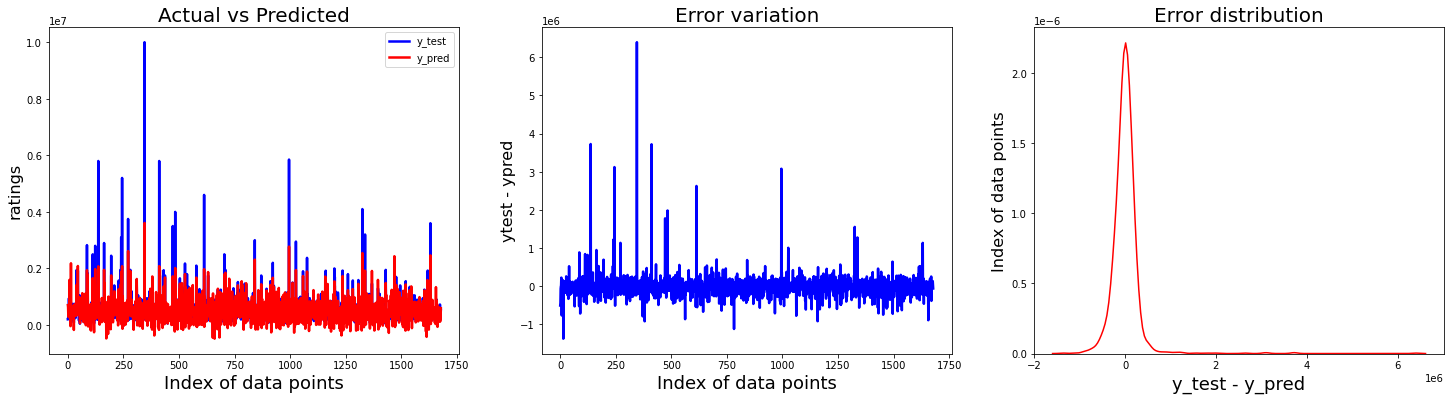

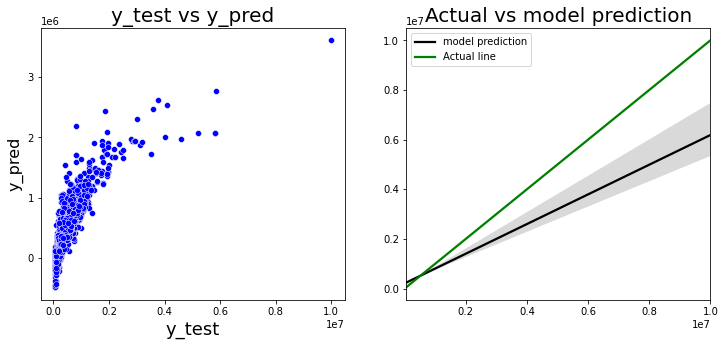

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

print('Results for Ridge Regressor:-\n')
start_time = time.time()
ridge.fit(X_train,y_train)
ridge_time = (time.time() - start_time)
print('Training time(sec) = ',ridge_time)

y_pred1 = ridge.predict(X_train)

start_time = time.time()
y_pred = ridge.predict(X_test)
ridge_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',ridge_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Ridge = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,ridge_time,ridge_time2]

Results for Lasso Regressor:-

Training time(sec) =  0.17306065559387207
Prediction time(sec) =  0.004019975662231445


Training r2_score = 0.6608187922747291
Testing r2_score = 0.6374385361214103

Training mean_square_error = 85255640693.11998
Testing mean_square_error = 109484435622.42276

Training mean_absolute_error = 164062.62484883075
Testing mean_absolute_error = 168626.9407125188





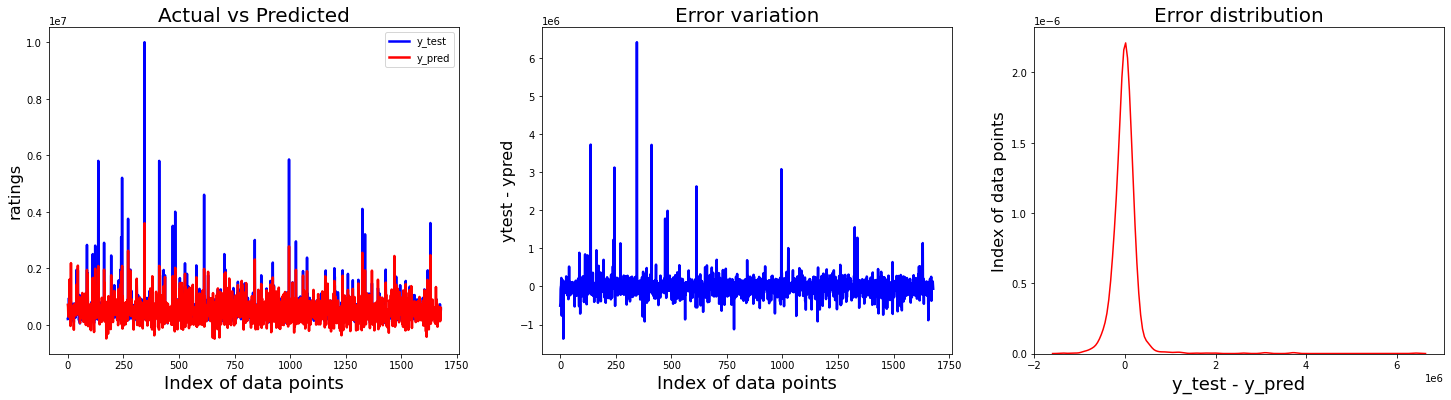

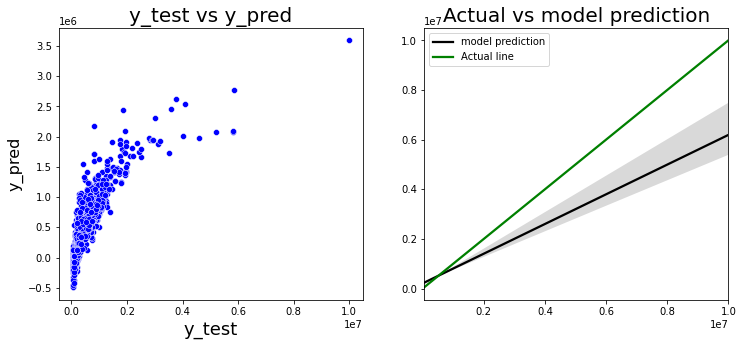

In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

print('Results for Lasso Regressor:-\n')
start_time = time.time()
lasso.fit(X_train,y_train)
lasso_time = (time.time() - start_time)
print('Training time(sec) = ',lasso_time)

y_pred1 = lasso.predict(X_train)

start_time = time.time()
y_pred = lasso.predict(X_test)
lasso_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lasso_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Lasso = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,lasso_time,lasso_time2]

Results for knn Regressor:-

Training time(sec) =  0.0069963932037353516
Prediction time(sec) =  0.23064637184143066


Training r2_score = 0.8625689806761413
Testing r2_score = 0.7983394345474362

Training mean_square_error = 34544277031.56965
Testing mean_square_error = 60896414527.0167

Training mean_absolute_error = 88808.94056416368
Testing mean_absolute_error = 110184.11197141155





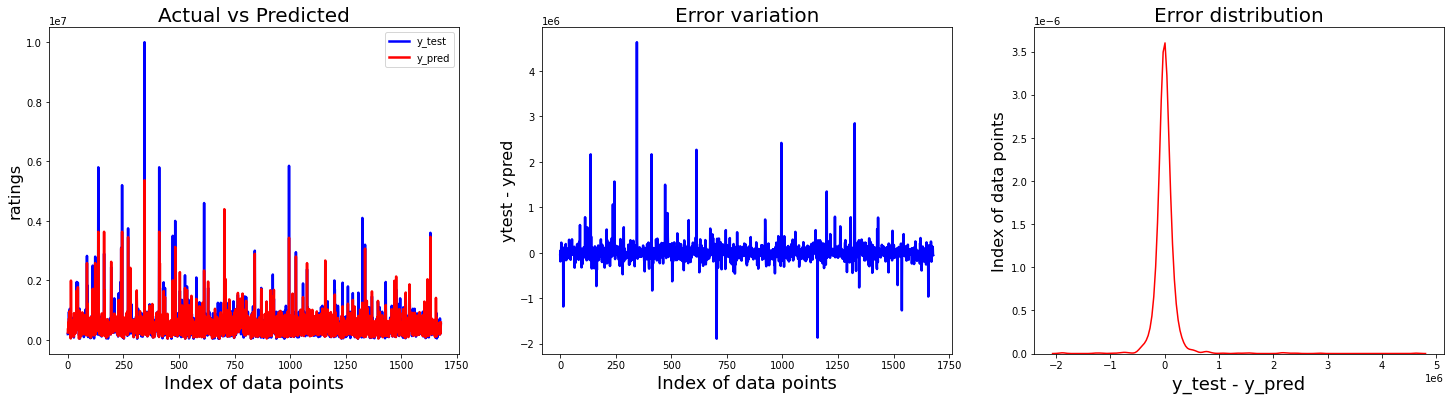

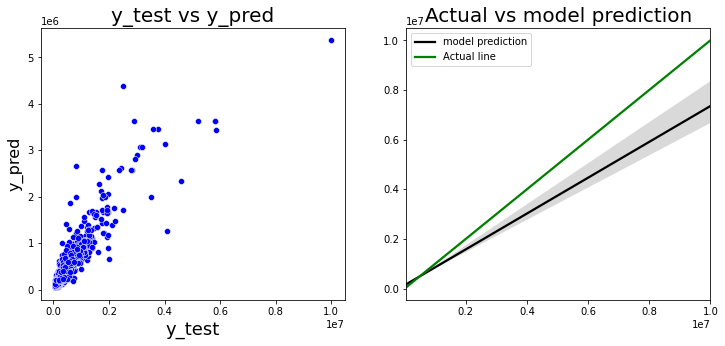

In [43]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

print('Results for knn Regressor:-\n')
start_time = time.time()
knn.fit(X_train,y_train)
knn_time = (time.time() - start_time)
print('Training time(sec) = ',knn_time)

y_pred1 = knn.predict(X_train)

start_time = time.time()
y_pred = knn.predict(X_test)
knn_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',knn_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

KNN = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,knn_time,knn_time2]

Results for Support vector Regressor:-

Training time(sec) =  0.009001493453979492
Prediction time(sec) =  0.0040013790130615234


Training r2_score = 0.8625689806761413
Testing r2_score = -0.8204133570729184

Training mean_square_error = 34544277031.56965
Testing mean_square_error = 549719010030.7792

Training mean_absolute_error = 88808.94056416368
Testing mean_absolute_error = 497099.29176568164





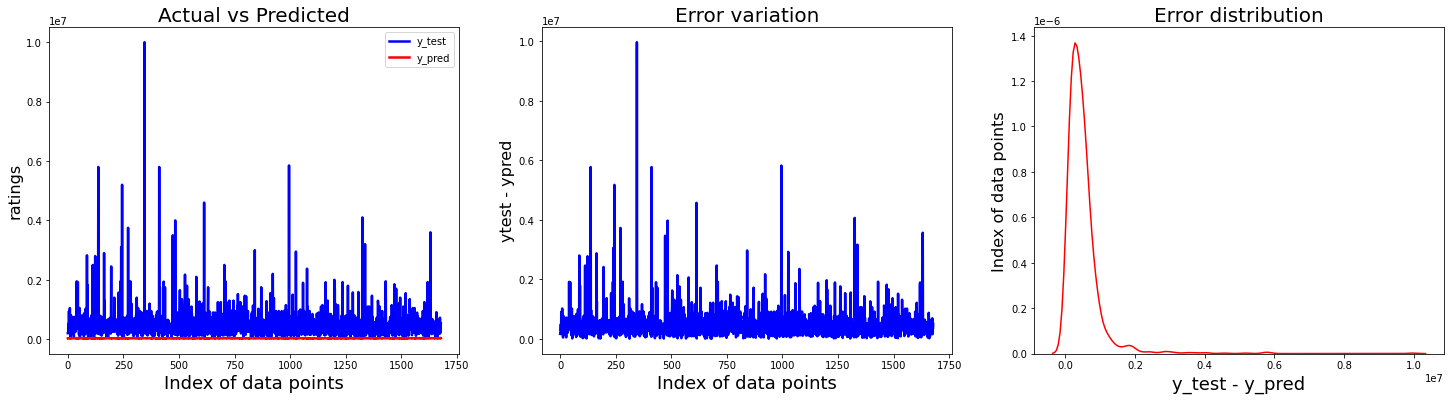

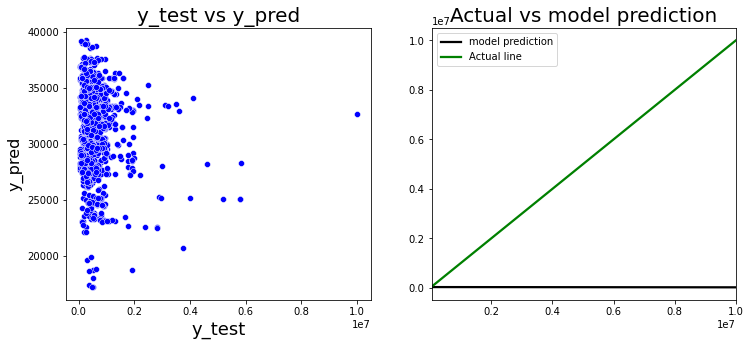

In [44]:
svr = LinearSVR()

print('Results for Support vector Regressor:-\n')
start_time = time.time()
svr.fit(X_train,y_train)
svr_time = (time.time() - start_time)
print('Training time(sec) = ',svr_time)

y_pred1 = knn.predict(X_train)

start_time = time.time()
y_pred = svr.predict(X_test)
svr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svr_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

SVR = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,svr_time,svr_time2]

Results for DecisionTree Regressor:-

Training time(sec) =  0.03128242492675781
Prediction time(sec) =  0.0


Training r2_score = 0.9991492524779543
Testing r2_score = 0.8118218372717505

Training mean_square_error = 213841520.1317375
Testing mean_square_error = 56825068285.983025

Training mean_absolute_error = 3407.1660045027143
Testing mean_absolute_error = 107695.31844351797





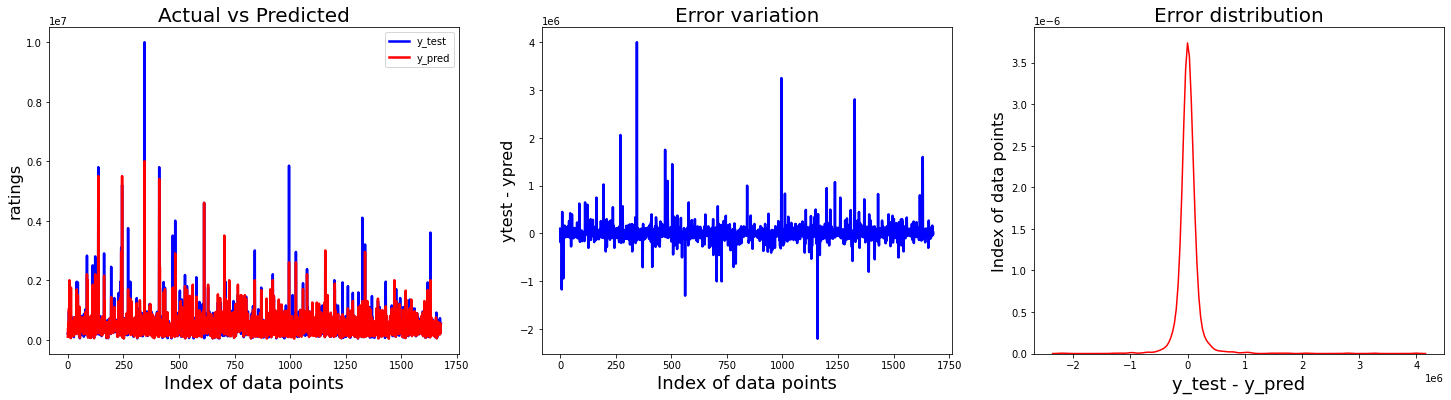

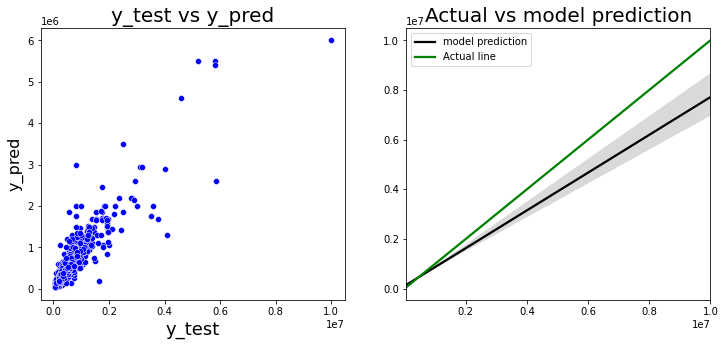

In [45]:
dt = DecisionTreeRegressor(max_depth=None)

print('Results for DecisionTree Regressor:-\n')
start_time = time.time()
dt.fit(X_train,y_train)
dt_time = (time.time() - start_time)
print('Training time(sec) = ',dt_time)

y_pred1 = dt.predict(X_train)

start_time = time.time()
y_pred = dt.predict(X_test)
dt_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dt_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

DT = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,dt_time,dt_time2]

Results for RandomForest Regressor:-

Training time(sec) =  0.6347100734710693
Prediction time(sec) =  0.1134648323059082


Training r2_score = 0.9886238679839959
Testing r2_score = 0.8660393227196901

Training mean_square_error = 2859472758.3478737
Testing mean_square_error = 40452752453.97736

Training mean_absolute_error = 29742.66535964582
Testing mean_absolute_error = 81183.45432476407





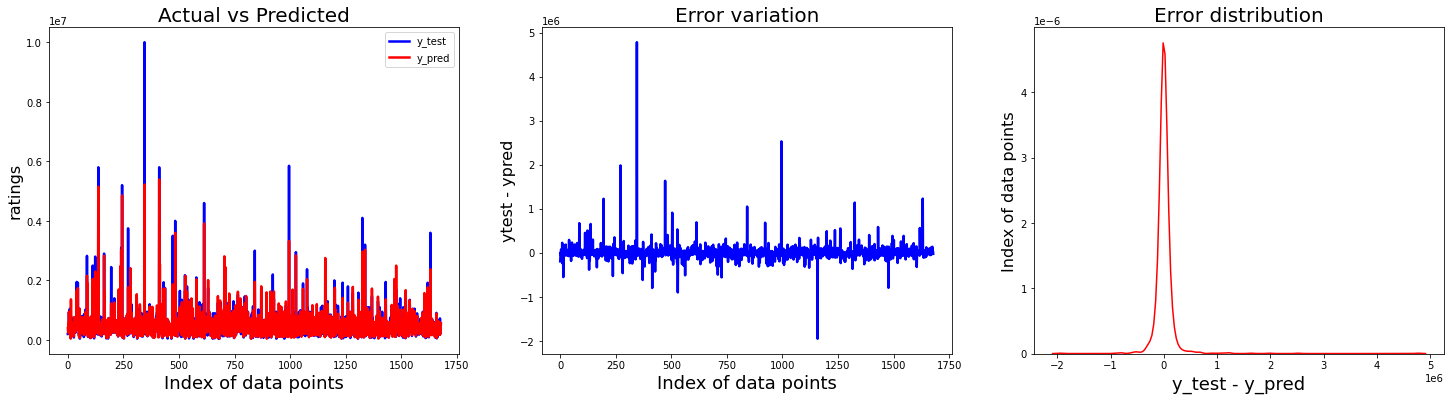

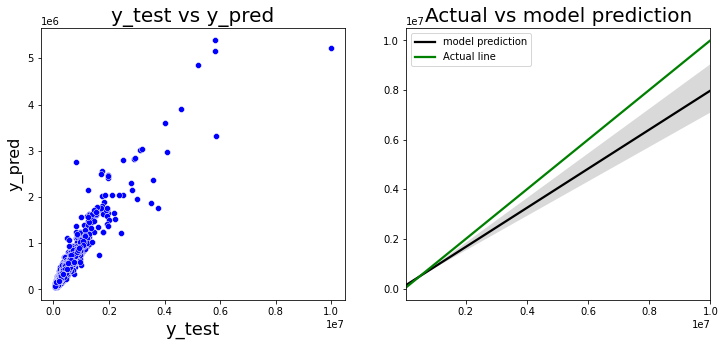

In [46]:
rf = RandomForestRegressor(n_jobs=-1)

print('Results for RandomForest Regressor:-\n')
start_time = time.time()
rf.fit(X_train,y_train)
rf_time = (time.time() - start_time)
print('Training time(sec) = ',rf_time)

y_pred1 = rf.predict(X_train)

start_time = time.time()
y_pred = rf.predict(X_test)
rf_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',rf_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

RF = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,rf_time,rf_time2]

Results for ExtraTrees Regressor:-

Training time(sec) =  0.6337244510650635
Prediction time(sec) =  0.12482166290283203


Training r2_score = 0.9991475098380553
Testing r2_score = 0.8789399211494294

Training mean_square_error = 214279545.22775128
Testing mean_square_error = 36557096464.61247

Training mean_absolute_error = 3451.0012581115084
Testing mean_absolute_error = 80174.21689696249





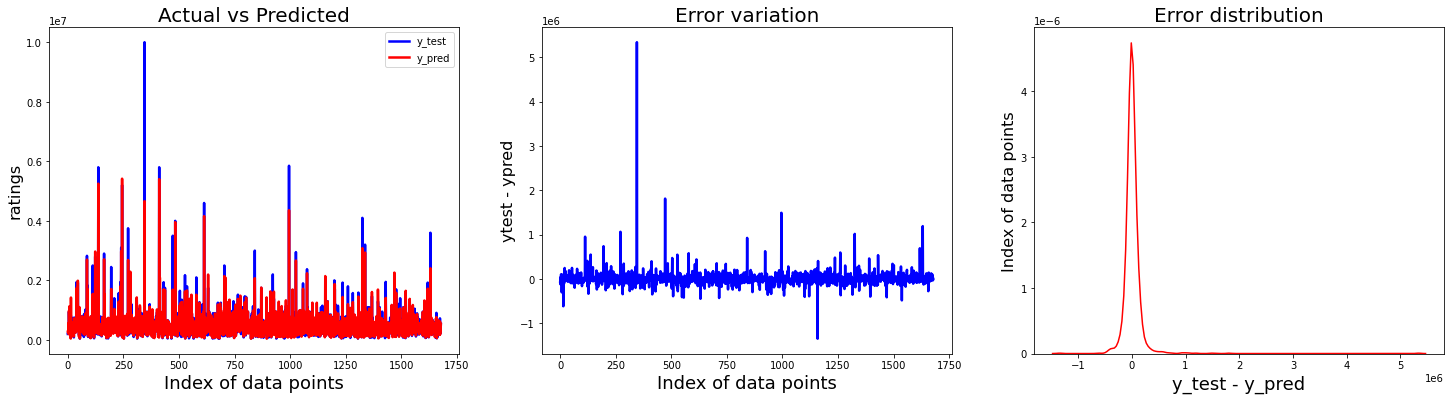

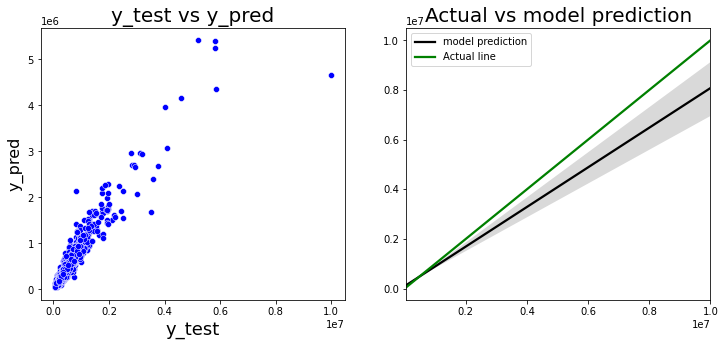

In [47]:
etree = ExtraTreesRegressor(n_jobs=-1)

print('Results for ExtraTrees Regressor:-\n')
start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Extra_tree = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,etree_time,etree_time2]

In [48]:
s1=[Ridge,Lasso,KNN,SVR,DT,RF,Extra_tree]
s2=['Ridge','Lasso','Knn','Linear_svr','Decision_tree','Random_forest','Extra_tree']
col=['r2_score(train)','r2_score(test)','MSE(train)','MSE(test)','MAE(train)','MAE(train)','Training time','Prediction time']
result3=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result3[s2[i]] = s1[i]

In [49]:
temp = pd.DataFrame.from_dict(result3, orient='index',columns=col).reset_index()
result3 = temp.rename(columns={'index':'model'})

In [50]:
#with binary encoding
result3

model  r2_score(train)  r2_score(test)    MSE(train)     MSE(test)  \
0          Ridge         0.660777        0.638117  8.526603e+10  1.092796e+11   
1          Lasso         0.660819        0.637439  8.525564e+10  1.094844e+11   
2            Knn         0.862569        0.798339  3.454428e+10  6.089641e+10   
3     Linear_svr         0.862569       -0.820413  3.454428e+10  5.497190e+11   
4  Decision_tree         0.999149        0.811822  2.138415e+08  5.682507e+10   
5  Random_forest         0.988624        0.866039  2.859473e+09  4.045275e+10   
6     Extra_tree         0.999148        0.878940  2.142795e+08  3.655710e+10   

      MAE(train)     MAE(train)  Training time  Prediction time  
0  163793.439559  168353.844287       0.007991         0.003001  
1  164062.624849  168626.940713       0.173061         0.004020  
2   88808.940564  110184.111971       0.006996         0.230646  
3   88808.940564  497099.291766       0.009001         0.004001  
4    3407.166005  107695.318444       0.031282         0.000000  
5   29742.665360   81183.454325       0.634710         0.113465  
6    3451.001258   80174.216897       0.633724         0.124822

In [51]:
#with ordinal encoding
result2

model  r2_score(train)  r2_score(test)    MSE(train)     MSE(test)  \
0          Ridge         0.635900        0.623547  9.151923e+10  1.136792e+11   
1          Lasso         0.635912        0.623258  9.151621e+10  1.137665e+11   
2            Knn         0.845909        0.668997  3.873186e+10  9.995460e+10   
3     Linear_svr         0.845909       -0.176299  3.873186e+10  3.552128e+11   
4  Decision_tree         0.999149        0.804736  2.138415e+08  5.896471e+10   
5  Random_forest         0.988152        0.867186  2.977975e+09  4.010656e+10   
6     Extra_tree         0.999148        0.884688  2.142119e+08  3.482134e+10   

      MAE(train)     MAE(train)  Training time  Prediction time  
0  166816.460450  169471.987642       0.010983         0.003001  
1  166942.425359  169540.755348       0.014000         0.002999  
2   92265.904132  117061.151757       0.028007         0.043004  
3   92265.904132  305888.289403       0.007004         0.002000  
4    3407.166005  104937.316557       0.035019         0.003997  
5   29837.788791   81464.671821       0.506903         0.127702  
6    3442.121640   79343.373111       0.406485         0.118549

In [52]:
#with one hot encoding
result

model  r2_score(train)  r2_score(test)    MSE(train)     MSE(test)  \
0          Ridge         0.760237        0.697122  6.026624e+10  9.146144e+10   
1          Lasso         0.770474        0.688013  5.769292e+10  9.421233e+10   
2            Knn         0.850257        0.802916  3.763890e+10  5.951446e+10   
3     Linear_svr         0.850257       -0.874788  3.763890e+10  5.661387e+11   
4  Decision_tree         0.999149        0.837379  2.138415e+08  4.910738e+10   
5  Random_forest         0.987761        0.868626  3.076453e+09  3.967161e+10   
6     Extra_tree         0.999148        0.882849  2.141959e+08  3.537660e+10   

      MAE(train)     MAE(train)  Training time  Prediction time  
0  133480.118692  132864.792091       0.056998         0.000000  
1  131455.607433  132700.809745       0.329025         0.000000  
2   90484.974017  110218.681477       0.003003         0.259007  
3   90484.974017  513843.778479       0.004993         0.000000  
4    3407.166005   98997.331050       0.048988         0.001000  
5   29904.576790   80065.940276       0.754328         0.108085  
6    3446.210502   79274.247784       0.713681         0.110708

<p3>So using binary encoding results are improved but still one hot works best for models like lasso,ridge</p3>

<p3>Drawback of using label encoding is that it will not work for new label but we can modify label encoding to work for new label as well for eg.For rare categories we can assign a constant label and use this same label for new categories as well during testing</p3>

<h5>So out of all models we take Extra tree(with label encoding) as our final model since it has good accuracy and more important takes less time to train.Although we need to do hyperparameter tuning since it is overfitting to train data</h5>

In [53]:
X=df.iloc[:,df.columns!='selling_price']
y=df.iloc[:,df.columns=='selling_price']

cat_columns=['name','fuel','seller_type','owner']

encoder = OrdinalEncoder()

X[cat_columns]= encoder.fit_transform(X[cat_columns])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

X_train.shape,X_test.shape

((5034, 13), (1679, 13))

In [54]:
scaler = StandardScaler()

num_columns=['km_driven','mileage','engine','max_power','torque_NM','torque_rpm']

X_train[num_columns]= scaler.fit_transform(X_train[num_columns])
X_test[num_columns]= scaler.transform(X_test[num_columns])

In [55]:
X_train.shape,X_test.shape

((5034, 13), (1679, 13))

Results for ExtraTrees Regressor:-

Training time(sec) =  0.6966168880462646
Prediction time(sec) =  0.11685800552368164


Training r2_score = 0.9991476622996676
Testing r2_score = 0.8906233289987786

Training mean_square_error = 214241222.90289366
Testing mean_square_error = 33029001391.163303

Training mean_absolute_error = 3444.5617136803066
Testing mean_absolute_error = 79387.79750148898





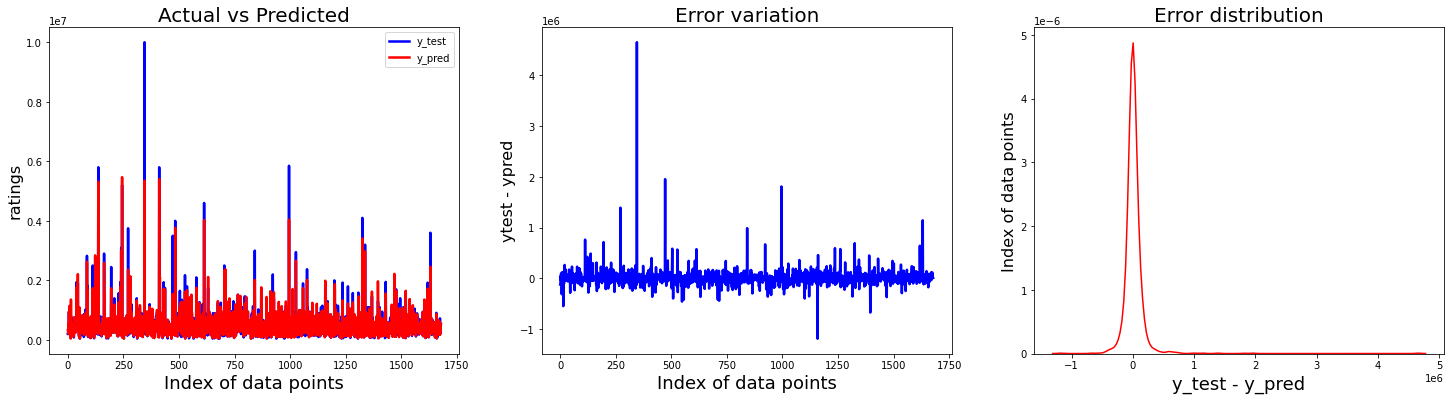

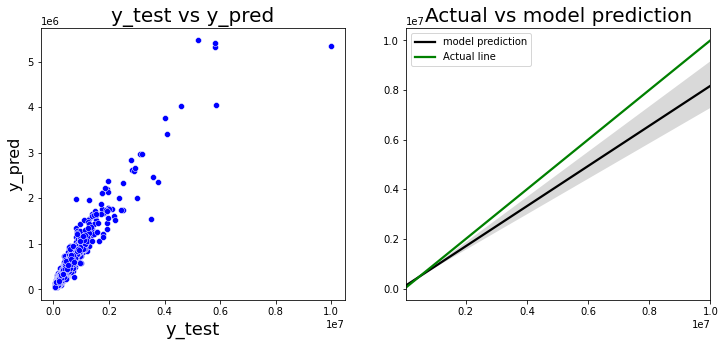

In [56]:
etree = ExtraTreesRegressor(n_jobs=-1)

print('Results for ExtraTrees Regressor:-\n')
start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Extra_tree = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,etree_time,etree_time2]

In [57]:
from sklearn.model_selection import cross_val_score
import optuna 
from optuna import Trial,visualization
from optuna.samplers import TPESampler

class Objective(object):
    def __init__(self, xcalib, ycalib, error_type, cv_folds=3,use_cv=False):
        self.xcalib = xcalib
        self.ycalib = ycalib
        self.error_type = error_type
        self.cv_folds = cv_folds
        self.use_cv = use_cv
        
    def __call__(self, trial):
        criterion = ['mse','mae']
        max_features = ['auto', 'sqrt', 'log2']
        max_samples = np.arange(0.5,1,0.1)
        
        etree_criterion = trial.suggest_categorical('etree_criterion', criterion)
        etree_max_features = trial.suggest_categorical('etree_max_features', max_features)
        etree_max_depth = trial.suggest_int('etree_max_depth', 40, 80, step=3)
        etree_n_estimators = trial.suggest_int('etree_n_estimators', 10, 100)
        etree_max_samples = trial.suggest_categorical('etree_max_samples', max_samples)
        etree_min_samples_split = trial.suggest_int('etree_min_samples_split', 5, 40, step=3)
        etree_min_samples_leaf = trial.suggest_int('etree_min_samples_leaf', 1, 5, step=1)
        
        


        classifier_obj = ExtraTreesRegressor(criterion = etree_criterion,max_features = etree_max_features,
                                             n_estimators = etree_n_estimators,max_samples = etree_max_samples , 
                                             max_depth=etree_max_depth,min_samples_split=etree_min_samples_split,
                                                min_samples_leaf= etree_min_samples_leaf,n_jobs=-1)
    
        
        if self.use_cv == False:
            X_train,X_test,y_train,y_test=train_test_split(self.xcalib,self.ycalib,
                                                           test_size=0.20,random_state=101) 
            
            classifier_obj.fit(X_train,y_train)
            score=classifier_obj.score(X_test,y_test)
            
        else:
            score = cross_val_score(classifier_obj, self.xcalib, self.ycalib, 
                                            scoring=self.error_type, 
                                            cv=self.cv_folds, n_jobs=-1).mean()
 
        return score

In [58]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold()

In [59]:
error_type = 'r2'
optimizer_direction = 'maximize'
cross_valid_folds = cv
 
objective = Objective(X_train, y_train, error_type, cross_valid_folds,use_cv=False)

start_time = time.time()
study = optuna.create_study(direction=optimizer_direction,sampler=TPESampler())
study.optimize(objective, n_trials=100 ,show_progress_bar = True)
print('Total time(sec) = ',(time.time() - start_time))

[I 2021-06-12 12:57:05,873] A new study created in memory with name: no-name-b3d7cf9a-44aa-425f-9544-3f1989995652


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2021-06-12 12:57:06,225] Trial 0 finished with value: 0.7983004387749123 and parameters: {'etree_criterion': 'mse', 'etree_max_features': 'sqrt', 'etree_max_depth': 58, 'etree_n_estimators': 46, 'etree_max_samples': 0.5, 'etree_min_samples_split': 20, 'etree_min_samples_leaf': 5}. Best is trial 0 with value: 0.7983004387749123.
[I 2021-06-12 12:57:10,860] Trial 1 finished with value: 0.8537355225892427 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'auto', 'etree_max_depth': 76, 'etree_n_estimators': 30, 'etree_max_samples': 0.7999999999999999, 'etree_min_samples_split': 35, 'etree_min_samples_leaf': 5}. Best is trial 1 with value: 0.8537355225892427.
[I 2021-06-12 12:57:11,899] Trial 2 finished with value: 0.7098189355105724 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'sqrt', 'etree_max_depth': 61, 'etree_n_estimators': 12, 'etree_max_samples': 0.7, 'etree_min_samples_split': 17, 'etree_min_samples_leaf': 5}. Best is trial 1 with value: 0.8537

[I 2021-06-12 12:59:36,898] Trial 24 finished with value: 0.9050142254985745 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'auto', 'etree_max_depth': 79, 'etree_n_estimators': 37, 'etree_max_samples': 0.8999999999999999, 'etree_min_samples_split': 8, 'etree_min_samples_leaf': 3}. Best is trial 18 with value: 0.9243401164084379.
[I 2021-06-12 12:59:45,282] Trial 25 finished with value: 0.9177427934811628 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'auto', 'etree_max_depth': 64, 'etree_n_estimators': 50, 'etree_max_samples': 0.8999999999999999, 'etree_min_samples_split': 8, 'etree_min_samples_leaf': 2}. Best is trial 18 with value: 0.9243401164084379.
[I 2021-06-12 12:59:51,647] Trial 26 finished with value: 0.9095992740313982 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'auto', 'etree_max_depth': 73, 'etree_n_estimators': 37, 'etree_max_samples': 0.8999999999999999, 'etree_min_samples_split': 14, 'etree_min_samples_leaf': 2}. B

[I 2021-06-12 13:01:52,433] Trial 47 finished with value: 0.8971391407131585 and parameters: {'etree_criterion': 'mse', 'etree_max_features': 'auto', 'etree_max_depth': 61, 'etree_n_estimators': 48, 'etree_max_samples': 0.7, 'etree_min_samples_split': 14, 'etree_min_samples_leaf': 1}. Best is trial 18 with value: 0.9243401164084379.
[I 2021-06-12 13:02:08,299] Trial 48 finished with value: 0.9170399236897723 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'auto', 'etree_max_depth': 73, 'etree_n_estimators': 99, 'etree_max_samples': 0.8999999999999999, 'etree_min_samples_split': 5, 'etree_min_samples_leaf': 2}. Best is trial 18 with value: 0.9243401164084379.
[I 2021-06-12 13:02:12,485] Trial 49 finished with value: 0.8098213727435639 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'log2', 'etree_max_depth': 67, 'etree_n_estimators': 69, 'etree_max_samples': 0.8999999999999999, 'etree_min_samples_split': 11, 'etree_min_samples_leaf': 4}. Best is trial 1

[I 2021-06-12 13:05:21,457] Trial 71 finished with value: 0.9164688894571755 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'auto', 'etree_max_depth': 79, 'etree_n_estimators': 77, 'etree_max_samples': 0.5, 'etree_min_samples_split': 8, 'etree_min_samples_leaf': 1}. Best is trial 56 with value: 0.9256879555312418.
[I 2021-06-12 13:05:30,913] Trial 72 finished with value: 0.9236895583021681 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'auto', 'etree_max_depth': 73, 'etree_n_estimators': 75, 'etree_max_samples': 0.5, 'etree_min_samples_split': 8, 'etree_min_samples_leaf': 1}. Best is trial 56 with value: 0.9256879555312418.
[I 2021-06-12 13:05:41,010] Trial 73 finished with value: 0.9111199505731462 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'auto', 'etree_max_depth': 73, 'etree_n_estimators': 85, 'etree_max_samples': 0.5, 'etree_min_samples_split': 11, 'etree_min_samples_leaf': 2}. Best is trial 56 with value: 0.925687955531241

[I 2021-06-12 13:08:18,458] Trial 95 finished with value: 0.9283108209279747 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'auto', 'etree_max_depth': 55, 'etree_n_estimators': 68, 'etree_max_samples': 0.5, 'etree_min_samples_split': 5, 'etree_min_samples_leaf': 1}. Best is trial 95 with value: 0.9283108209279747.
[I 2021-06-12 13:08:21,864] Trial 96 finished with value: 0.9166934370515029 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'sqrt', 'etree_max_depth': 58, 'etree_n_estimators': 67, 'etree_max_samples': 0.5, 'etree_min_samples_split': 5, 'etree_min_samples_leaf': 1}. Best is trial 95 with value: 0.9283108209279747.
[I 2021-06-12 13:08:29,267] Trial 97 finished with value: 0.9254694150623902 and parameters: {'etree_criterion': 'mae', 'etree_max_features': 'auto', 'etree_max_depth': 52, 'etree_n_estimators': 62, 'etree_max_samples': 0.5, 'etree_min_samples_split': 5, 'etree_min_samples_leaf': 1}. Best is trial 95 with value: 0.9283108209279747

In [60]:
optuna.visualization.plot_slice(study)

In [61]:
optuna.visualization.plot_slice(study, ['etree_n_estimators'])

In [62]:
trial=study.best_trial
print(trial.value)

oldkeys = list(trial.params.keys())
vals = list(trial.params.values())
newkeys = [s.split('_',1)[1] for s in oldkeys]
best_params = {k: v for k, v in zip(newkeys, vals)}

best_params

0.9283108209279747


{'criterion': 'mae',
 'max_features': 'auto',
 'max_depth': 55,
 'n_estimators': 68,
 'max_samples': 0.5,
 'min_samples_split': 5,
 'min_samples_leaf': 1}

Results for ExtraTrees Regressor:-

Training time(sec) =  12.347599506378174
Prediction time(sec) =  0.11197566986083984


Training r2_score = 0.9907620343124115
Testing r2_score = 0.8947985169583944

Training mean_square_error = 2322029244.127066
Testing mean_square_error = 31768199726.016808

Training mean_absolute_error = 27290.570356867418
Testing mean_absolute_error = 75763.83057141856





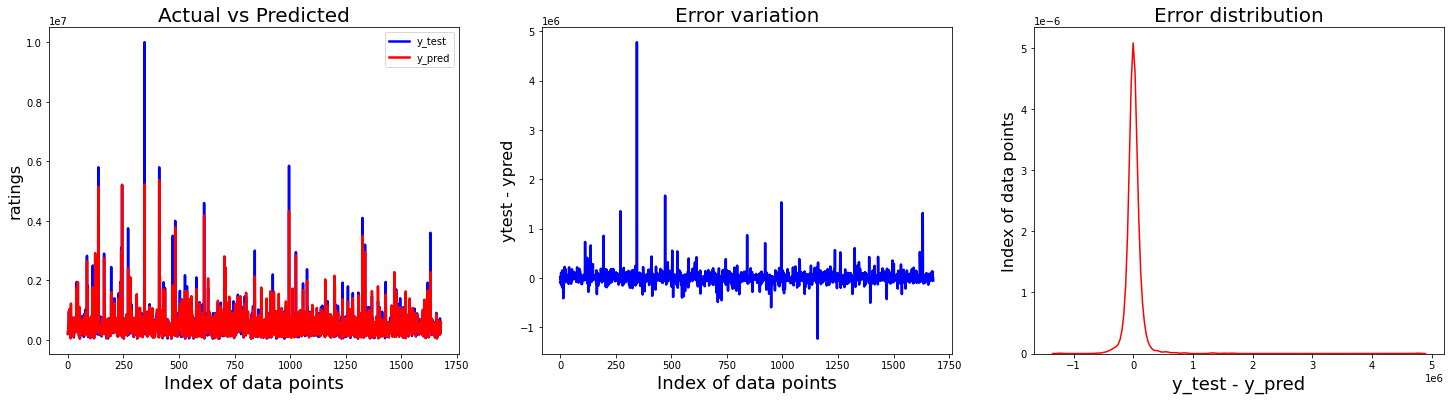

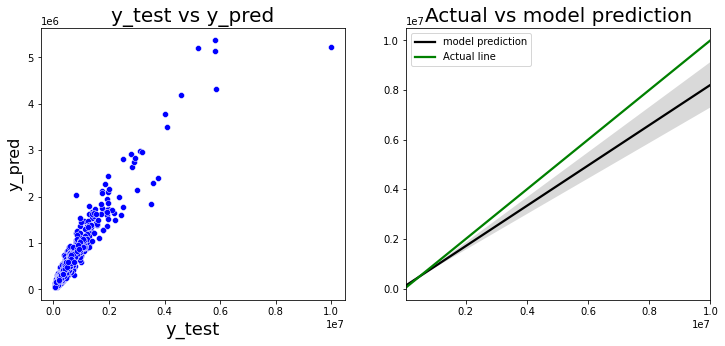

In [63]:
etree = ExtraTreesRegressor(**best_params,n_jobs=-1)

print('Results for ExtraTrees Regressor:-\n')
start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Extra_tree = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,etree_time,etree_time2]

#### Saving The model

In [ ]:
from joblib import dump
dump(encoder,'encoder.joblib') 
dump(scaler,'scaler.joblib')
dump(etree,'etree.joblib') 